In [230]:
 # HOME WORK 3 

In [229]:
# Working with Text Data and Naive Bayes in Scikit-Learn
# Representing text as data
# 1. Give a simple dataset
# simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [231]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [232]:
# 2. learn the 'vocabulary' of the training data
# use CountVectorizer() to "convert text into a matrix of token counts":

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [234]:
# 3. transform training data into a 'document-term matrix' (which is a sparse matrix)
# use “transform()”

In [235]:
vect.fit(simple_train)
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [236]:
# 4. print the sparse matrix

In [237]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [238]:
# 5. convert the sparse matrix to a dense matrix
# use “toarray()”

In [239]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [240]:
# 6. examine the vocabulary and document-term matrix together
# use pandas DataFrame and columns by using “get_feature_names()”

In [241]:
import pandas as pd
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [242]:
# 7. transform testing data into a document-term matrix (using existing vocabulary)
# use the test data as:
# simple_test = ["please don't call me"]

In [243]:
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [244]:
# 8. examine the vocabulary and document-term matrix together

In [245]:
import pandas as pd
pd.DataFrame( simple_test_dtm.toarray(), columns = vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [246]:
# Reading SMS data

In [247]:
# 9. read tab-separated file “sms.tsv”; give the names of columns as ['label', 'message']; and use head()
# to view part of the data.

In [248]:
filepath = "C:\\Users\\Akshay\\Desktop\\DataSci\\HW-3\\sms.tsv"
sms = pd.read_table(filepath, sep='\t', header = None, names = ['label', 'message'])
print('dimension:', sms.shape)
sms.head(10)

dimension: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [249]:
# 10. convert label to a numeric variable

In [250]:
# let's first examine the class distribution
sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [251]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [252]:
# 11. define X and y

In [253]:
X = sms['message']
y = sms['label_num']

In [254]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [255]:
# 12. split into training and testing sets by train_test_split(); 
# and print the shape of training set and test set.

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [257]:
# Vectorizing SMS data

In [258]:
# 13. instantiate the vectorizer by CountVectorizer()

In [259]:
vect = CountVectorizer()

In [260]:
# 14. learn training data vocabulary, 
# then create document-term matrix “X_train_dtm”

In [261]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [262]:
# 15. transform testing data (using fitted vocabulary) into a document-term matrix

In [263]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [264]:
# Building a Naive Bayes model by using Multinomial Naïve Bayes

In [265]:
# 16. train a Naive Bayes model using the matrix “X_train_dtm”

In [266]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [267]:
# 17. calculate accuracy of predictions

In [268]:
y_pred_class = nb.predict(X_test_dtm)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.9885139985642498


In [269]:
# 18. give the confusion matrix

In [270]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[1203    5]
 [  11  174]]


In [271]:
# let's first predict probability

In [272]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.87744864e-03, 1.83488846e-05, 2.07301295e-03, ...,
       1.09026171e-06, 1.00000000e+00, 3.98279868e-09])

In [273]:
# 19. print message text for the false positives

In [274]:
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [275]:
# 20. print message text for the false negatives

In [276]:
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [277]:
# Linear Regression

In [278]:
# load the Boston Housing Data

In [279]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [280]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [281]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [282]:
type(boston_dataset)

sklearn.utils.Bunch

In [283]:
y = boston_dataset.target
boston = pd.DataFrame(boston_dataset.data)

In [284]:
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [285]:
# 1. First, use boston.corr() to show what features are correlated with each other.

In [286]:
boston.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


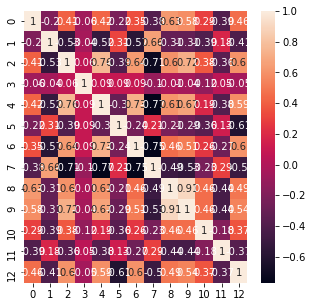

In [287]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [288]:
# 2. The columns don't have any labels. This happens with some datasets. According to the column
# values shown in https://www.kaggle.com/c/boston-housing, you need to label the columns.
# Note: only label 13 columns (the website has 14 labels for the columns), remove the last one of 'medv'.
# And use boston.corr() again.

In [289]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [290]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [291]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [292]:
# 3. Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a
# plot. Please plot correlations by color according to the following figure and giving the labels of x and y

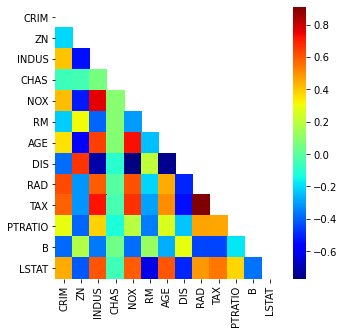

In [293]:
y = boston.corr()
z = np.triu(y)
sns.heatmap(y, mask = z, cmap = "jet")
plt.rcParams["figure.figsize"] = 5,5
plt.show()

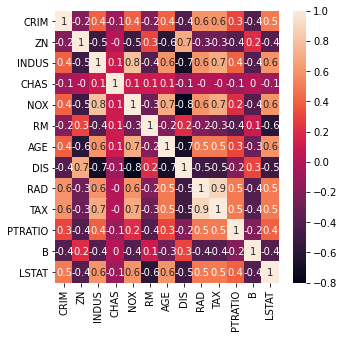

In [294]:
# to get more clarity let's get the values printed
correlation_matrix = boston.corr().round(1)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [295]:
# 4. In the above plot, what features are highly correlated? Which features are highly uncorrelated?
#
# Features Highly Correlated:
#     1. TAX - RAD (+0.9)
#         where:
#             TAX = full-value property-tax rate per $10,000
#             RAD = index of accessibility to radial highways
#     2. NOX - INDUS (+0.8)
#     3. NOX - AGE (+0.7)
#    
# Features Highly Uncorrelated :
#     1. DIS - NOX (-0.8)
#         where:
#             DIS = weighted mean of distances to five Boston employment centres
#             NOX = nitrogen oxides concentration (parts per 10 million)
#     2. DIS - AGE (-0.7)
#     3. DIS - INDUS (-0.7)

In [296]:
# Building the Linear Regression Model

In [297]:
 # 5. First, please split the data into two datasets as “training” dataset and “test” dataset by train_test_split(). 
 # According to the four steps taught in the classes, please train the model by linear regression. 

In [298]:
y = boston_dataset.target

In [299]:
type(y)

numpy.ndarray

In [300]:
y = pd.DataFrame(boston_dataset.target)

In [301]:
y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [302]:
# using features of Data
X = boston[[X for X in boston.columns]]

In [303]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [304]:
# split training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [305]:
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)


In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
# create linear regression object
model_test = LinearRegression()

In [308]:
# train the model using the training set
model_test.fit(X_train, y_train)

LinearRegression()

In [309]:
# Predict and Score Model

In [310]:
model_test.score(X_test, y_test)

0.7634174432138463

In [311]:
# 6. Then, please predict new values using the test set

In [312]:
y_pred = model_test.predict(X_test)

In [313]:
y_pred

array([[32.65503184],
       [28.0934953 ],
       [18.02901829],
       [21.47671576],
       [18.8254387 ],
       [19.87997758],
       [32.42014863],
       [18.06597765],
       [24.42277848],
       [27.00977832],
       [27.04081017],
       [28.75196794],
       [21.15677699],
       [26.85200196],
       [23.38835945],
       [20.66241266],
       [17.33082198],
       [38.24813601],
       [30.50550873],
       [ 8.74436733],
       [20.80203902],
       [16.26328126],
       [25.21805656],
       [24.85175752],
       [31.384365  ],
       [10.71311063],
       [13.80434635],
       [16.65930389],
       [36.52625779],
       [14.66750528],
       [21.12114902],
       [13.95558618],
       [43.16210242],
       [17.97539649],
       [21.80116017],
       [20.58294808],
       [17.59938821],
       [27.2212319 ],
       [ 9.46139365],
       [19.82963781],
       [24.30751863],
       [21.18528812],
       [29.57235682],
       [16.3431752 ],
       [19.31483171],
       [14

In [314]:
# Please give the coefficient for your model. 

In [315]:
# 7. The sign of a regression coefficient tells you whether there is a positive or negative correlation
# between each independent variable and the dependent variable. 
# What does a positive coefficient and a negative coefficient indicate respectively?

# Answer: 
# The sign of a regression coefficient tells you whether there is a positive or negative correlation 
# between each independent variable the dependent variable. 

# A positive coefficient indicates that as the value of the independent variable increases, 
# the mean of the dependent variable also tends to increase. 

# A negative coefficient suggests that as the independent variable increases, 
# the dependent variable tends to decrease.
    

 7. The sign of a regression coefficient tells you whether there is a positive or negative correlation
 between each independent variable and the dependent variable. 
 What does a positive coefficient and a negative coefficient indicate respectively?

 Answer: 
 The sign of a regression coefficient tells you whether there is a positive or negative correlation 
 between each independent variable the dependent variable. 

 A positive coefficient indicates that as the value of the independent variable increases, 
 the mean of the dependent variable also tends to increase. 

 A negative coefficient suggests that as the independent variable increases, 
 the dependent variable tends to decrease.

In [316]:
# The coefficients
print('Coefficients: \n', model_test.coef_)
# 13 Independent Column will produce 13 Values of the Coefficient

Coefficients: 
 [[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
  -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
   3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
  -5.44644997e-01]]


In [317]:
# 8. Finally, to gain an understanding of how your model is performing, please score the model against
# three metrics: R squared, mean squared error, and mean absolute error. Write the lines of code to
# get your output; and answer the questions:
# a) What do these metrics of R Squared, Mean Squared Error, and Mean Absolute Error? What are the numbers telling you?
# b) What you think could improve the model? Try the possible improved model in coding lines as a bonus.

In [318]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [319]:
print('Mean Squared Error: %.2f'  % mean_squared_error(y_test, y_pred))

Mean Squared Error: 23.38


In [320]:
print('Mean Absolute Error: %.2f'  % mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.75


In [321]:
print('R2 Score: %.2f'  % r2_score(y_test, y_pred))

R2 Score: 0.76


Answer:
R Squared -
It is also known as the coefficient of determination. 
This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.
In our model the value came 0.76, which denotes fairly a good coefficient of determination.

Mean Squared Error -
MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data.
It is used to determine the model's performance.
The smaller the means squared error, the closer you are to finding the line of best fit. 
In our model the value came 23.38, which denotes a fair MSE, could be improved.

Mean Absolute Error -
MAE is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions.
In our model the value came 3.75, which denoted fairly a good model.



In [322]:
# a) What do these metrics of R Squared, Mean Squared Error, and Mean Absolute Error? What are the numbers telling you?
# Answer:
#R Squared -
# It is also known as the coefficient of determination. 
# This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.
# In our model the value came 0.76, which denotes fairly a good coefficient of determination.

# Mean Squared Error -
# MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data.
# It is used to determine the model's performance.
# The smaller the means squared error, the closer you are to finding the line of best fit. 
# In our model the value came 23.38, which denotes a fair MSE, could be improved.

# Mean Absolute Error -
# MAE is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions.
# In our model the value came 3.75, which denoted fairly a good model.



In [330]:
# b) What you think could improve the model? Try the possible improved model in coding lines as a bonus.
# Answer:
# Earlier we split the data in 80%-Training and 20%-Testing. So, to improve the model we can change the Split size parameter.
# By providing more of the Trainig Data to the model, we can improve the system.
# let's split 90%-Training and 10%-Testing
# Let's use test_size=0.1 to have a look at the changes:-

 b) What you think could improve the model? Try the possible improved model in coding lines as a bonus.
 Answer:
 Earlier we split the data in 80%-Training and 20%-Testing. So, to improve the model we can change the Split size parameter.
 By providing more of the Trainig Data to the model, we can improve the system.
 let's split 90%-Training and 10%-Testing
 Let's use test_size=0.1 to have a look at the changes:-

In [331]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
print(X1_train.shape)
print(X1_test.shape)

(455, 13)
(51, 13)


In [332]:
model_test1 = LinearRegression()

In [333]:
model_test1.fit(X1_train, y1_train)

LinearRegression()

In [334]:
# Coefficient of Determination tells how good the model fits to the dataset, and that is an important aspect to choose model
model_test1.score(X1_test, y1_test)

0.7786386580298901

In [335]:
# Earlier with test_size=0.2 - the score was 0.76
# Now with test_size=0.1 - the score is 0.77, which shows improvement in the model

Earlier with test_size=0.2 - the score was 0.76
Now with test_size=0.1 - the score is 0.77, which shows improvement in the model